In [89]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib

import seaborn as sns
from scipy.stats import ttest_ind
import geopandas as gpd

In [91]:
# https://eric.clst.org/tech/usgeojson/
# https://www.weather.gov/gis/USStates

In [93]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
us = gpd.read_file('./data/s_22mr22/s_22mr22.shp')

In [51]:
print(type(us))
us.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."


In [52]:
us.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [56]:
gdf = us.set_index("STATE")

In [57]:
gdf["area"] = gdf.area
gdf["area"]

/var/folders/wx/jdk00pf51bj00q6tgsbrn_vr0000gn/T/ipykernel_16048/2969711843.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


STATE
AK    279.640921
AL     12.870622
AR     13.585591
AS      0.017061
AZ     28.921380
CA     41.623655
CO     28.039439
CT      1.390348
DC      0.016988
DE      0.535242
FL     13.354814
GA     14.651156
HI      1.440208
IA     15.857126
ID     24.456852
IL     15.408512
IN      9.872015
KS     22.004395
KY     10.668511
LA     11.237308
MA      2.288664
ME      9.674075
MI     17.010277
MN     25.536397
MS     11.879580
MT     45.077582
NC     12.753008
ND     21.839025
NE     21.615450
NH      2.683599
NJ      2.071942
NM     30.892777
NV     29.937626
NY     13.893624
OH     11.317424
OK     18.005487
OR     28.153253
PA     12.534376
PR      0.762790
RI      0.305420
SD     22.578360
TN     10.889346
TX     65.133454
UT     22.974847
VA     10.632414
VI      0.029747
VT      2.797629
WA     20.842497
WI     16.486973
WV      6.493794
WY     27.971677
MO     18.614233
SC      7.854362
GU      0.045443
MD      2.754263
PW      0.037719
MH      0.011534
MP      0.038277
FM      

In [58]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

STATE
AK    MULTILINESTRING ((-179.10754 51.30120, -179.10...
AL    MULTILINESTRING ((-88.11011 30.25891, -88.1063...
AR    MULTILINESTRING ((-91.62986 36.49921, -91.6284...
AS    MULTILINESTRING ((-170.77310 -14.36245, -170.7...
AZ    LINESTRING (-110.49090 37.00361, -110.48750 37...
CA    MULTILINESTRING ((-118.42620 32.79973, -118.42...
CO    LINESTRING (-106.87560 41.00301, -106.85850 41...
CT    MULTILINESTRING ((-73.62247 40.98430, -73.6220...
DC    MULTILINESTRING ((-77.03097 38.80826, -77.0311...
DE    MULTILINESTRING ((-75.22731 38.58854, -75.2274...
FL    MULTILINESTRING ((-81.96339 24.52110, -81.9637...
GA    MULTILINESTRING ((-81.49619 30.73234, -81.4964...
HI    MULTILINESTRING ((-155.91183 19.18402, -155.91...
IA    LINESTRING (-92.44900 43.50181, -92.44550 43.5...
ID    LINESTRING (-116.06000 49.00081, -116.04919 49...
IL    MULTILINESTRING ((-90.64000 42.50841, -90.6366...
IN    LINESTRING (-86.08849 41.76071, -86.06750 41.7...
KS    LINESTRING (-101.87420 40.00311, -10

In [59]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

/var/folders/wx/jdk00pf51bj00q6tgsbrn_vr0000gn/T/ipykernel_16048/3714020261.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid


STATE
AK     POINT (-152.24098 64.24019)
AL      POINT (-86.82676 32.79354)
AR      POINT (-92.43920 34.89977)
AS    POINT (-170.37215 -14.26486)
AZ     POINT (-111.66457 34.29323)
CA     POINT (-119.60818 37.24537)
CO     POINT (-105.54783 38.99855)
CT      POINT (-72.72623 41.62196)
DC      POINT (-77.01464 38.90932)
DE      POINT (-75.50592 38.99559)
FL      POINT (-82.50934 28.67402)
GA      POINT (-83.44848 32.65155)
HI     POINT (-156.34743 20.24923)
IA      POINT (-93.50003 42.07463)
ID     POINT (-114.65933 44.38907)
IL      POINT (-89.19838 40.06501)
IN      POINT (-86.27548 39.90801)
KS      POINT (-98.38019 38.48471)
KY      POINT (-85.29046 37.52668)
LA      POINT (-92.02905 31.08910)
MA      POINT (-71.81423 42.25788)
ME      POINT (-69.22999 45.38046)
MI      POINT (-85.43679 44.34719)
MN      POINT (-94.30924 46.31640)
MS      POINT (-89.66553 32.75201)
MT     POINT (-109.64507 47.03350)
NC      POINT (-79.37865 35.54369)
ND     POINT (-100.46935 47.44626)
NE      POINT 

In [60]:
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']

/var/folders/wx/jdk00pf51bj00q6tgsbrn_vr0000gn/T/ipykernel_16048/2530803384.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance'] = gdf['centroid'].distance(first_point)


STATE
AK      0.000000
AL     72.580388
AR     66.611661
AS     80.571594
AZ     50.430798
CA     42.351149
CO     53.079102
CT     82.669101
DC     79.376667
DE     80.780933
FL     78.278060
GA     75.698420
HI     44.182202
IA     62.783850
ID     42.502323
IL     67.518958
IN     70.310042
KS     59.702003
KY     72.083174
LA     68.734790
MA     83.376761
ME     85.126464
MI     69.703169
MN     60.641149
MS     70.051359
MT     45.939987
NC     78.309698
ND     54.427366
NE     57.138715
NH     83.241120
NJ     81.211801
NM     54.930685
NV     43.422729
NY     79.625642
OH     73.464218
OK     61.780962
OR     37.635570
PA     78.022807
PR     97.336789
RI     83.781073
SD     55.653325
TN     71.755853
TX     62.199365
UT     47.604254
VA     78.124277
VI     98.930213
VT     82.093418
WA     35.993677
WI     65.244088
WV     76.063806
WY     49.480469
MO     65.123749
SC     77.524863
GU    301.328579
MD     79.550983
PW    292.326913
MH    326.890721
MP    301.769116
FM    31

In [61]:
gdf['distance'].mean()

86.59949986223789

In [65]:
u = r"gz_2010_us_040_00_5m.json"
us_main = gpd.read_file(u)

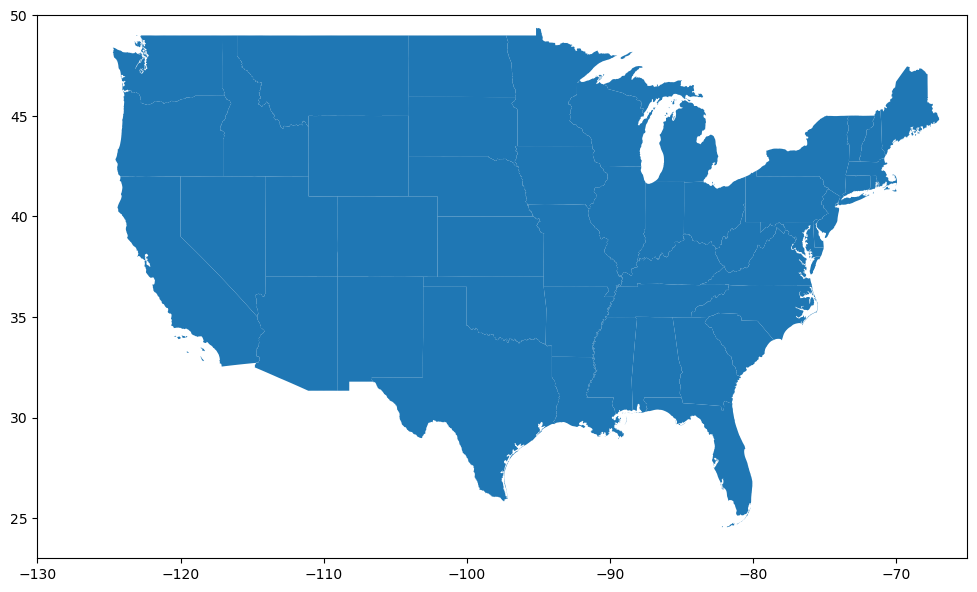

In [88]:
fig, ax = plt.subplots(figsize=(12, 8),dpi=100)
ax = us_main.plot(ax=ax)

plt.xlim([-130, -65])
plt.ylim([23, 50])
plt.show()

In [ ]:
gdf.explore("area", legend=False)